In [166]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#ImageDatagenerator = Will give label to the image automatically.

from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import numpy as np 
 

In [167]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
train_dataset = train.flow_from_directory('/content/drive/My Drive/Project/basedata/training', target_size = (200 , 200), batch_size = 3, class_mode = 'binary')

validation_dataset = validation.flow_from_directory('/content/drive/My Drive/Project/basedata/validation', target_size = (200 , 200), batch_size = 3, class_mode = 'binary')

Found 68 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [170]:
train_dataset.class_indices

{'happy': 0, 'not_happy': 1}

In [171]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [172]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [176]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #                                       
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512, activation='sigmoid'),
                                    #
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                    ]) 

In [177]:
model.compile(loss = 'binary_crossentropy',    #binary cross entropy because it is a special case of cross entropy working on only two classes.
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

model.compile


<bound method Model.compile of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fbf82dba0f0>>

In [178]:
model.fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 50,
                      validation_data = validation_dataset)

Epoch 1/50
3/3 [==============================] - 1s 439ms/step - loss: 7.7485 - accuracy: 0.6667
Epoch 2/50
3/3 [==============================] - 1s 462ms/step - loss: 0.8958 - accuracy: 0.3750
Epoch 3/50
3/3 [==============================] - 2s 646ms/step - loss: 0.9538 - accuracy: 0.3333
Epoch 4/50
3/3 [==============================] - 2s 543ms/step - loss: 0.6128 - accuracy: 0.6667
Epoch 5/50
3/3 [==============================] - 1s 467ms/step - loss: 0.6276 - accuracy: 0.8750
Epoch 6/50
3/3 [==============================] - 1s 405ms/step - loss: 0.5321 - accuracy: 0.6667
Epoch 7/50
3/3 [==============================] - 1s 404ms/step - loss: 1.0677 - accuracy: 0.6667
Epoch 8/50
3/3 [==============================] - 2s 502ms/step - loss: 0.7290 - accuracy: 0.7778
Epoch 9/50
3/3 [==============================] - 2s 601ms/step - loss: 0.6547 - accuracy: 0.7778
Epoch 10/50
3/3 [==============================] - 1s 496ms/step - loss: 0.5989 - accuracy: 0.6250
Epoch 11/50
3/3 [==

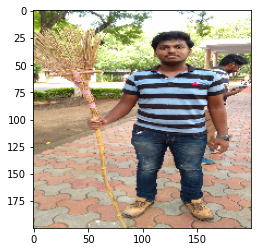

You are not Happy, WISH TO SEE YOU SMILING


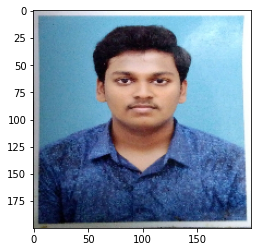

You are happy KEEP SMILING ALWAYS


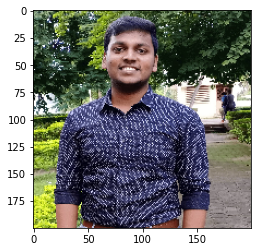

You are happy KEEP SMILING ALWAYS


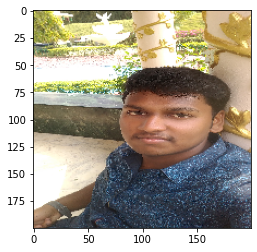

You are not Happy, WISH TO SEE YOU SMILING


In [179]:
dir_path = '/content/drive/My Drive/Project/basedata/testing'

for  i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//'+ i, target_size = (200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis =0)
  images = np.vstack([X])

  val = model.predict(images)
  if val == 0:
    print("You are happy KEEP SMILING ALWAYS")
  else:
    print("You are not Happy, WISH TO SEE YOU SMILING")